# Data Science Project Workflow

## Project Overview
- **Objective**: Define the problem and goals of the project.
- **Milestones**: Data Collection, Exploration, Preprocessing, Advanced Analysis, Model Development, Deployment, and Final Documentation.

---

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

# Milestone 1: Data Collection, Exploration, and Preprocessing

## Data Collection
- Acquire a dataset from reliable sources (e.g., Kaggle, UCI Repository, or APIs).
- **Scraping Data**:
  - Increase dataset size through web scraping or APIs (e.g., Selenium, BeautifulSoup).
  - Explore public repositories or other accessible sources for additional data.

In [5]:
# taking what i need from the data (300k)
df=pd.read_csv("/content/drive/MyDrive/original dataset.csv",index_col=False)
df['HeartDisease'].value_counts()
df1=df[df['HeartDisease']=='Yes']
df1.value_counts()


HeartDisease  BMI    Smoking  AlcoholDrinking  Stroke  PhysicalHealth  MentalHealth  DiffWalking  Sex     AgeCategory  Race   Diabetic  PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  SkinCancer
Yes           26.45  Yes      No               No      0               0             No           Male    65-69        White  No        Yes               Good       7          No      No             No            3
              26.63  No       No               No      0               0             No           Female  80 or older  White  No        Yes               Good       8          No      No             No            3
              27.81  Yes      No               No      0               0             No           Female  70-74        White  No        Yes               Very good  8          No      No             No            3
              25.10  No       No               No      0               0             No           Male    65-69        White  No        Yes               Very good  7          No      No             No            3
              29.29  Yes      No               No      0               0             No           Female  80 or older  White  No        Yes               Good       7          No      No             No            3
                                                                                                                                                                                                                    ..
              26.15  Yes      No               No      0               0             No           Male    70-74        White  No        Yes               Excellent  10         No      No             No            1
                                                                                                          65-69        White  No        Yes               Good       7          Yes     No             No            1
                                                                                                  Female  80 or older  White  No        No                Good       8          No      No             No            1
                     No       No               Yes     0               0             No           Female  65-69        White  No        Yes               Excellent  8          Yes     No             No            1
                     Yes      No               No      30              0             Yes          Female  65-69        White  No        No                Good       4          No      No             No            1
Name: count, Length: 27261, dtype: int64

In [6]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [7]:
df2=df[df['HeartDisease']=='No']
df2=df2.iloc[:40000]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40000 entries, 0 to 43621
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      40000 non-null  object 
 1   BMI               40000 non-null  float64
 2   Smoking           40000 non-null  object 
 3   AlcoholDrinking   40000 non-null  object 
 4   Stroke            40000 non-null  object 
 5   PhysicalHealth    40000 non-null  int64  
 6   MentalHealth      40000 non-null  int64  
 7   DiffWalking       40000 non-null  object 
 8   Sex               40000 non-null  object 
 9   AgeCategory       40000 non-null  object 
 10  Race              40000 non-null  object 
 11  Diabetic          40000 non-null  object 
 12  PhysicalActivity  40000 non-null  object 
 13  GenHealth         40000 non-null  object 
 14  SleepTime         40000 non-null  int64  
 15  Asthma            40000 non-null  object 
 16  KidneyDisease     40000 non-null  object 
 17

In [8]:
full_data=pd.concat([df1,df2])
full_data.info()
full_data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 67373 entries, 5 to 43621
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      67373 non-null  object 
 1   BMI               67373 non-null  float64
 2   Smoking           67373 non-null  object 
 3   AlcoholDrinking   67373 non-null  object 
 4   Stroke            67373 non-null  object 
 5   PhysicalHealth    67373 non-null  int64  
 6   MentalHealth      67373 non-null  int64  
 7   DiffWalking       67373 non-null  object 
 8   Sex               67373 non-null  object 
 9   AgeCategory       67373 non-null  object 
 10  Race              67373 non-null  object 
 11  Diabetic          67373 non-null  object 
 12  PhysicalActivity  67373 non-null  object 
 13  GenHealth         67373 non-null  object 
 14  SleepTime         67373 non-null  int64  
 15  Asthma            67373 non-null  object 
 16  KidneyDisease     67373 non-null  object 
 17

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
5,Yes,28.87,Yes,No,No,6,0,Yes,Female,75-79,Black,No,No,Fair,12,No,No,No
10,Yes,34.30,Yes,No,No,30,0,Yes,Male,60-64,White,Yes,No,Poor,15,Yes,No,No
35,Yes,32.98,Yes,No,Yes,10,0,Yes,Male,75-79,White,Yes,Yes,Poor,4,No,No,Yes
42,Yes,25.06,No,No,No,0,0,Yes,Female,80 or older,White,Yes,No,Good,7,No,No,Yes
43,Yes,30.23,Yes,No,No,6,2,Yes,Female,75-79,White,Yes,Yes,Fair,8,No,Yes,No


In [9]:
full_data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
5,Yes,28.87,Yes,No,No,6,0,Yes,Female,75-79,Black,No,No,Fair,12,No,No,No
10,Yes,34.30,Yes,No,No,30,0,Yes,Male,60-64,White,Yes,No,Poor,15,Yes,No,No
35,Yes,32.98,Yes,No,Yes,10,0,Yes,Male,75-79,White,Yes,Yes,Poor,4,No,No,Yes
42,Yes,25.06,No,No,No,0,0,Yes,Female,80 or older,White,Yes,No,Good,7,No,No,Yes
43,Yes,30.23,Yes,No,No,6,2,Yes,Female,75-79,White,Yes,Yes,Fair,8,No,Yes,No


In [10]:
full_data.to_csv("1111.csv")

## Dataset Description
- Create a table to explain:

 Features Overview
Target Variable:

HeartDisease → (0 = No, 1 = Yes)

Demographics:

Sex → (0 = Female, 1 = Male)

AgeCategory → Age group (Encoded values)

Race → Ethnic background (Encoded values)

Health Metrics:

BMI → Body Mass Index

PhysicalHealth → Number of days with poor physical health in the past 30 days

MentalHealth → Number of days with poor mental health in the past 30 days

SleepTime → Average sleep duration in hours

Medical History:

Stroke → History of stroke (0 = No, 1 = Yes)

Diabetic → Diabetes status (0 = No, 1 = Yes)

Asthma → Asthma diagnosis (0 = No, 1 = Yes)

KidneyDisease → Chronic kidney disease (0 = No, 1 = Yes)

SkinCancer → History of skin cancer (0 = No, 1 = Yes)

Lifestyle Factors:

Smoking → Smoker status (0 = No, 1 = Yes)

AlcoholDrinking → Regular alcohol consumption (0 = No, 1 = Yes)

PhysicalActivity → Engages in physical activity (0 = No, 1 = Yes)

Mobility & General Health:

DiffWalking → Difficulty walking or climbing stairs (0 = No, 1 = Yes)

GenHealth → General health rating (Encoded values from poor to excellent)

## Data Exploration
- Summary statistics (mean, median, variance).
- Identify missing values, duplicates, and outliers.
- Data distribution visualizations: histograms, box plots, scatter plots.

In [11]:
full_data.info()
full_data.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 67373 entries, 5 to 43621
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      67373 non-null  object 
 1   BMI               67373 non-null  float64
 2   Smoking           67373 non-null  object 
 3   AlcoholDrinking   67373 non-null  object 
 4   Stroke            67373 non-null  object 
 5   PhysicalHealth    67373 non-null  int64  
 6   MentalHealth      67373 non-null  int64  
 7   DiffWalking       67373 non-null  object 
 8   Sex               67373 non-null  object 
 9   AgeCategory       67373 non-null  object 
 10  Race              67373 non-null  object 
 11  Diabetic          67373 non-null  object 
 12  PhysicalActivity  67373 non-null  object 
 13  GenHealth         67373 non-null  object 
 14  SleepTime         67373 non-null  int64  
 15  Asthma            67373 non-null  object 
 16  KidneyDisease     67373 non-null  object 
 17

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,67373.000000,67373.000000,67373.000000,67373.000000
mean,28.519426,4.975109,4.210797,7.124798
std,6.411306,9.591404,8.400069,1.589251
min,12.210000,0.000000,0.000000,1.000000
25%,24.210000,0.000000,0.000000,6.000000
50%,27.440000,0.000000,0.000000,7.000000
75%,31.660000,4.000000,4.000000,8.000000
max,87.050000,30.000000,30.000000,24.000000


In [12]:
full_data['HeartDisease'].value_counts()

,count
HeartDisease,
No,40000
Yes,27373


In [13]:
# encoding every yes , no to 1,0
full_data=full_data.replace("No",0)
full_data=full_data.replace("Yes",1)
# encoding the diabetic feature
full_data['Diabetic']=full_data['Diabetic'].replace("No, borderline diabetes",0)
full_data['Diabetic']=full_data['Diabetic'].replace("Yes (during pregnancy)",1)

# encoding the sex
full_data['Sex']=full_data["Sex"].replace("Male",1)
full_data['Sex']=full_data["Sex"].replace("Female",0)

# encoding the races
full_data['Race']=full_data["Race"].replace("White",0)
full_data['Race']=full_data["Race"].replace("Black",1)
full_data['Race']=full_data["Race"].replace("Asian",2)
full_data['Race']=full_data["Race"].replace("American Indian/Alaskan Native",3)
full_data['Race']=full_data["Race"].replace("Hispanic",4)
full_data['Race']=full_data["Race"].replace("Other",5)


full_data.head(20)

<ipython-input-13-35e2f8dffa95>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  full_data=full_data.replace("Yes",1)
<ipython-input-13-35e2f8dffa95>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  full_data['Diabetic']=full_data['Diabetic'].replace("Yes (during pregnancy)",1)
<ipython-input-13-35e2f8dffa95>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
5,1,28.87,1,0,0,6,0,1,0,75-79,1,0,0,Fair,12,0,0,0
10,1,34.30,1,0,0,30,0,1,1,60-64,0,1,0,Poor,15,1,0,0
35,1,32.98,1,0,1,10,0,1,1,75-79,0,1,1,Poor,4,0,0,1
42,1,25.06,0,0,0,0,0,1,0,80 or older,0,1,0,Good,7,0,0,1
43,1,30.23,1,0,0,6,2,1,0,75-79,0,1,1,Fair,8,0,1,0
45,1,20.37,1,0,0,3,0,0,0,70-74,0,0,0,Poor,10,0,0,0
77,1,34.33,0,0,0,0,0,0,0,55-59,0,0,1,Good,8,0,0,0
78,1,28.29,1,0,0,30,30,0,0,70-74,0,1,1,Poor,9,0,1,0
101,1,24.68,1,0,0,30,30,1,1,70-74,0,0,1,Fair,8,0,0,1
127,1,33.65,0,0,0,2,0,1,0,70-74,0,1,0,Fair,4,0,0,0


In [14]:
# encoding the general health
encoding = {'Poor': 0, 'Fair': 1, 'Good': 2, 'Very good': 3, 'Excellent': 4}
full_data['GenHealth']=full_data['GenHealth'].map(encoding).astype(int)

In [15]:
# encoding the age categories
age_encoding = {
        '18-24': 0, '25-29': 1, '30-34': 2, '35-39': 3, '40-44': 4,
        '45-49': 5, '50-54': 6, '55-59': 7, '60-64': 8, '65-69': 9,
        '70-74': 10, '75-79': 11, '80 or older': 12
    }
full_data['AgeCategory']=full_data['AgeCategory'].map(age_encoding).astype(int)


In [16]:
full_data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
5,1,28.87,1,0,0,6,0,1,0,11,1,0,0,1,12,0,0,0
10,1,34.30,1,0,0,30,0,1,1,8,0,1,0,0,15,1,0,0
35,1,32.98,1,0,1,10,0,1,1,11,0,1,1,0,4,0,0,1
42,1,25.06,0,0,0,0,0,1,0,12,0,1,0,2,7,0,0,1
43,1,30.23,1,0,0,6,2,1,0,11,0,1,1,1,8,0,1,0


In [17]:
# droping the duplicates
full_data.duplicated().sum()
full_data=full_data.drop_duplicates()

{'whiskers': [<matplotlib.lines.Line2D at 0x7d1600620d90>,
 'caps': [<matplotlib.lines.Line2D at 0x7d16005c3850>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d16005c87d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7d160059bdd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d160059b550>],
 'means': []}

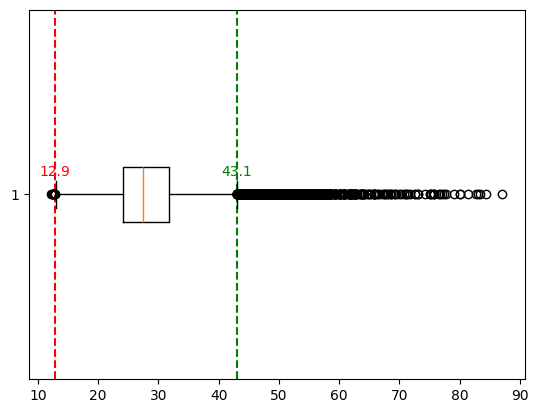

In [18]:
counter = full_data['BMI'].value_counts()
q1 = np.percentile(full_data['BMI'],25)
q3 = np.percentile(full_data['BMI'],75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
plt.axvline(lower_bound, color='red', linestyle='--', label=f'Lower Cutoff ({lower_bound:.1f})')
plt.axvline(upper_bound, color='green', linestyle='--', label=f'Upper Cutoff ({upper_bound:.1f})')
plt.text(lower_bound, 1.05, f'{lower_bound:.1f}', color='red', ha='center')
plt.text(upper_bound, 1.05, f'{upper_bound:.1f}', color='green', ha='center')
plt.boxplot(full_data['BMI'],whis=1.5,vert=False)

In [19]:
full_data=full_data[(full_data['BMI']>=12.9 ) & (full_data['BMI']<= 43.1)]

{'whiskers': [<matplotlib.lines.Line2D at 0x7d1600669c50>,
 'caps': [<matplotlib.lines.Line2D at 0x7d160058efd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d16006691d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7d160066bd90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d1600658750>],
 'means': []}

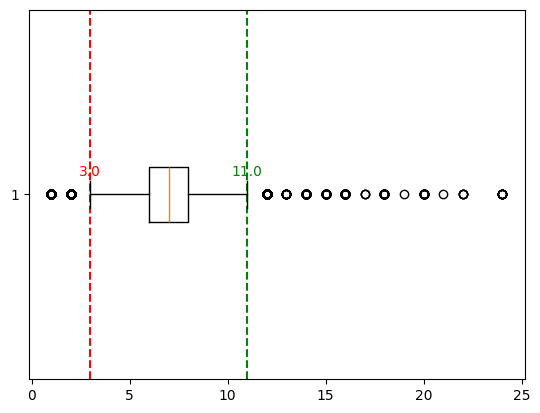

In [20]:
counter = full_data['SleepTime'].value_counts()
q1 = np.percentile(full_data['SleepTime'],25)
q3 = np.percentile(full_data['SleepTime'],75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
plt.axvline(lower_bound, color='red', linestyle='--', label=f'Lower Cutoff ({lower_bound:.1f})')
plt.axvline(upper_bound, color='green', linestyle='--', label=f'Upper Cutoff ({upper_bound:.1f})')
plt.text(lower_bound, 1.05, f'{lower_bound:.1f}', color='red', ha='center')
plt.text(upper_bound, 1.05, f'{upper_bound:.1f}', color='green', ha='center')
plt.boxplot(full_data['SleepTime'],whis=1.5,vert=False)

In [21]:
full_data=full_data[(full_data['SleepTime']>=3 ) & (full_data['SleepTime']<= 11)]

{'whiskers': [<matplotlib.lines.Line2D at 0x7d15fc437ed0>,
 'caps': [<matplotlib.lines.Line2D at 0x7d15fc440d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d16005e34d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7d15fc442010>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d15fc4429d0>],
 'means': []}

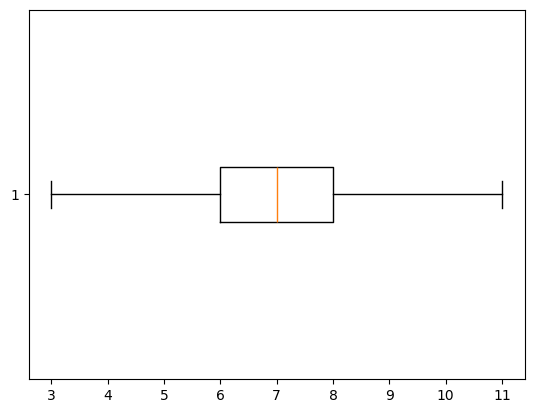

In [22]:

plt.boxplot(full_data['SleepTime'],whis=1.5,vert=False)

In [23]:
full_data.describe()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,63616.000000,63616.000000,63616.000000,63616.000000,63616.000000,63616.000000,63616.000000,63616.000000,63616.000000,63616.000000,63616.000000,63616.000000,63616.000000,63616.000000,63616.000000,63616.000000,63616.000000,63616.000000
mean,0.401267,27.927720,0.476185,0.059325,0.077355,4.729974,4.067436,0.204445,0.518203,7.476075,0.722428,0.191603,0.742769,2.340433,7.067845,0.151330,0.066053,0.131838
std,0.490159,5.346834,0.499436,0.236233,0.267156,9.358193,8.231912,0.403299,0.499672,3.472078,1.471427,0.393565,0.437111,1.124256,1.311664,0.358373,0.248376,0.338317
min,0.000000,12.970000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000
25%,0.000000,24.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,2.000000,6.000000,0.000000,0.000000,0.000000
50%,0.000000,27.340000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,1.000000,2.000000,7.000000,0.000000,0.000000,0.000000
75%,1.000000,31.240000,1.000000,0.000000,0.000000,3.000000,3.000000,0.000000,1.000000,10.000000,0.000000,0.000000,1.000000,3.000000,8.000000,0.000000,0.000000,0.000000
max,1.000000,43.100000,1.000000,1.000000,1.000000,30.000000,30.000000,1.000000,1.000000,12.000000,5.000000,1.000000,1.000000,4.000000,11.000000,1.000000,1.000000,1.000000


In [24]:
full_data.info()
full_data.tail(20)


<class 'pandas.core.frame.DataFrame'>
Index: 63616 entries, 35 to 43621
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      63616 non-null  int64  
 1   BMI               63616 non-null  float64
 2   Smoking           63616 non-null  int64  
 3   AlcoholDrinking   63616 non-null  int64  
 4   Stroke            63616 non-null  int64  
 5   PhysicalHealth    63616 non-null  int64  
 6   MentalHealth      63616 non-null  int64  
 7   DiffWalking       63616 non-null  int64  
 8   Sex               63616 non-null  int64  
 9   AgeCategory       63616 non-null  int64  
 10  Race              63616 non-null  int64  
 11  Diabetic          63616 non-null  int64  
 12  PhysicalActivity  63616 non-null  int64  
 13  GenHealth         63616 non-null  int64  
 14  SleepTime         63616 non-null  int64  
 15  Asthma            63616 non-null  int64  
 16  KidneyDisease     63616 non-null  int64  
 1

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
43602,0,33.47,0,0,0,0,0,0,1,4,1,0,0,4,7,0,0,0
43603,0,28.32,1,0,0,0,0,0,1,2,2,0,0,3,8,0,0,0
43604,0,21.79,0,0,0,0,15,0,0,1,0,0,1,3,6,1,0,0
43605,0,22.96,0,0,0,0,30,0,1,9,1,0,1,4,6,0,0,0
43606,0,36.65,0,0,0,1,0,0,1,7,1,0,1,2,6,0,1,0
43607,0,30.67,0,0,0,5,0,0,0,7,1,0,1,3,7,0,0,0
43608,0,34.04,0,0,0,1,0,0,1,4,0,0,1,3,8,0,0,0
43609,0,34.75,0,0,0,10,0,1,0,7,1,1,1,1,7,1,0,0
43610,0,23.99,1,0,0,0,0,0,1,3,0,0,1,4,8,0,0,0
43611,0,34.95,0,0,0,30,0,0,0,5,0,0,0,2,7,0,0,0


In [25]:
full_data.to_csv("i_hope_it_work.csv")

# Milestone 2: Advanced Data Analysis and Feature Engineering

## Feature Engineering
- Create derived features based on domain knowledge.
- Apply transformations such as normalization, log scaling, or polynomial features.

In [26]:
# devide the BMI into some secions
def classify_bmi(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 25:
        return "Normal"
    elif 25 <= bmi < 30:
        return "Overweight"


full_data["BMI"].apply(classify_bmi)



,BMI
35,None
42,Overweight
43,None
45,Normal
77,None
...,...
43617,Overweight
43618,None
43619,Overweight
43620,None


In [27]:
# over all Health Burden Score
full_data["PhysicalHealth"] + full_data["MentalHealth"]

,0
35,10
42,0
43,8
45,3
77,0
...,...
43617,2
43618,1
43619,0
43620,0


In [28]:
def sleep_deviation(sleep_time):
    if sleep_time < 6 :
        return "too little sleep"
    elif sleep_time > 9:
        return "too much sleep"
    else:
        return "good sleep"
full_data["SleepTime"].apply(sleep_deviation)

,SleepTime
35,too little sleep
42,good sleep
43,good sleep
45,too much sleep
77,good sleep
...,...
43617,good sleep
43618,good sleep
43619,good sleep
43620,good sleep


In [29]:
full_data.tail()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
43617,0,25.11,0,0,0,0,2,0,1,0,0,0,1,3,8,0,0,0
43618,0,34.01,1,0,0,0,1,0,0,4,0,0,1,3,8,1,0,0
43619,0,27.27,0,1,0,0,0,0,1,2,0,0,1,3,7,0,0,0
43620,0,32.26,0,0,0,0,0,0,1,11,1,0,0,2,6,0,0,0
43621,0,36.96,1,0,0,0,0,1,0,6,1,0,0,2,7,0,0,0


## Data Visualization
- Generate insightful visualizations:
  - Correlation heatmaps, pair plots.
  - Trends and comparisons using bar charts, line charts, and dashboards.

In [30]:
import plotly.graph_objects as go


full_data['Sex'] = full_data['Sex'].map({0: 'Female', 1: 'Male'})

heart_disease_rate = full_data.groupby(["Sex"])["HeartDisease"].mean().reset_index()

fig = px.bar(heart_disease_rate,
             x="Sex",
             y="HeartDisease",
             color="Sex",
             title="Heart Disease Rate by Gender",
             labels={"HeartDisease": "Heart Disease Rate", "Sex": "Gender"},
             color_discrete_map={"Female": "#FF9999", "Male": "#66B2FF"},
             text=heart_disease_rate["HeartDisease"].apply(lambda x: f"{x*100:.1f}%"),
             )


fig.update_traces(textposition='auto')
fig.update_layout(
    yaxis_title="Heart Disease Rate (%)",
    xaxis_title="Gender",
    title_x=0.5,
    yaxis_tickformat=".0%",
    showlegend=True,
    bargap=0.2,
    plot_bgcolor="white",
    font=dict(size=14),
)

fig.update_traces(hovertemplate="Gender: %{x}<br>Heart Disease Rate: %{y:.1%}")

fig.show()

In [31]:
fig = px.histogram(full_data, x='AgeCategory', color='HeartDisease', barmode='overlay',
                   title="Age vs heart disease Disease",
                   labels={'age': 'Age', 'cardio': 'Cardiovascular Disease'})
fig.update_layout(bargap=0.1)
fig.show()

In [32]:
fig = px.scatter(full_data, x='BMI', y='AgeCategory', color='HeartDisease',
                 title="BMI vs Age and Cardiovascular Disease",
                 labels={'BMI': 'Body Mass Index', 'age': 'Age', 'cardio': 'Cardiovascular Disease'},
                 size_max=10, opacity=0.6)
fig.show()

In [33]:
fig = px.histogram(full_data, x='AlcoholDrinking', color='HeartDisease',
                   title="Impact of Alcohol Drinking on Heart Disease",
                   labels={'AlcoholDrinking': 'Alcohol Drinking', 'count': 'Count'},
                   barmode='group',
                   color_discrete_sequence=px.colors.sequential.RdBu)

fig.show()

In [34]:
fig = px.histogram(full_data, x="Smoking", color="HeartDisease", barmode="group",
                    title="Smoking Rate Among Heart Disease Patients",
                    color_discrete_sequence=["#FF4500", "#32CD32"],
                    labels={"Smoking": "Smoking", "HeartDisease": "Heart Disease"})
fig.show()

In [35]:
fig = px.bar(np.around(full_data.groupby("PhysicalActivity")["HeartDisease"].mean().reset_index(),2),
              x="PhysicalActivity", y="HeartDisease",
              title="Heart Disease Rate Based on Physical Activity",
              text_auto=True,
              color="PhysicalActivity",
              color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

In [36]:
fig = px.strip(full_data, x="GenHealth", y="SleepTime", color="GenHealth",
                title="General Health vs Sleep Time",
                color_discrete_sequence=px.colors.qualitative.Set1,
                labels={"GenHealth": "General Health", "SleepTime": "Sleep Hours"})
fig.show()

In [37]:
fig = px.histogram(full_data, x="GenHealth", color="HeartDisease", barmode="group",
                    title="General Health Distribution Among Heart Disease Patients",
                    color_discrete_sequence=["#FF33FF", "#33CFFF"],
                    labels={"GenHealth": "General Health", "HeartDisease": "Heart Disease"})
fig.show()

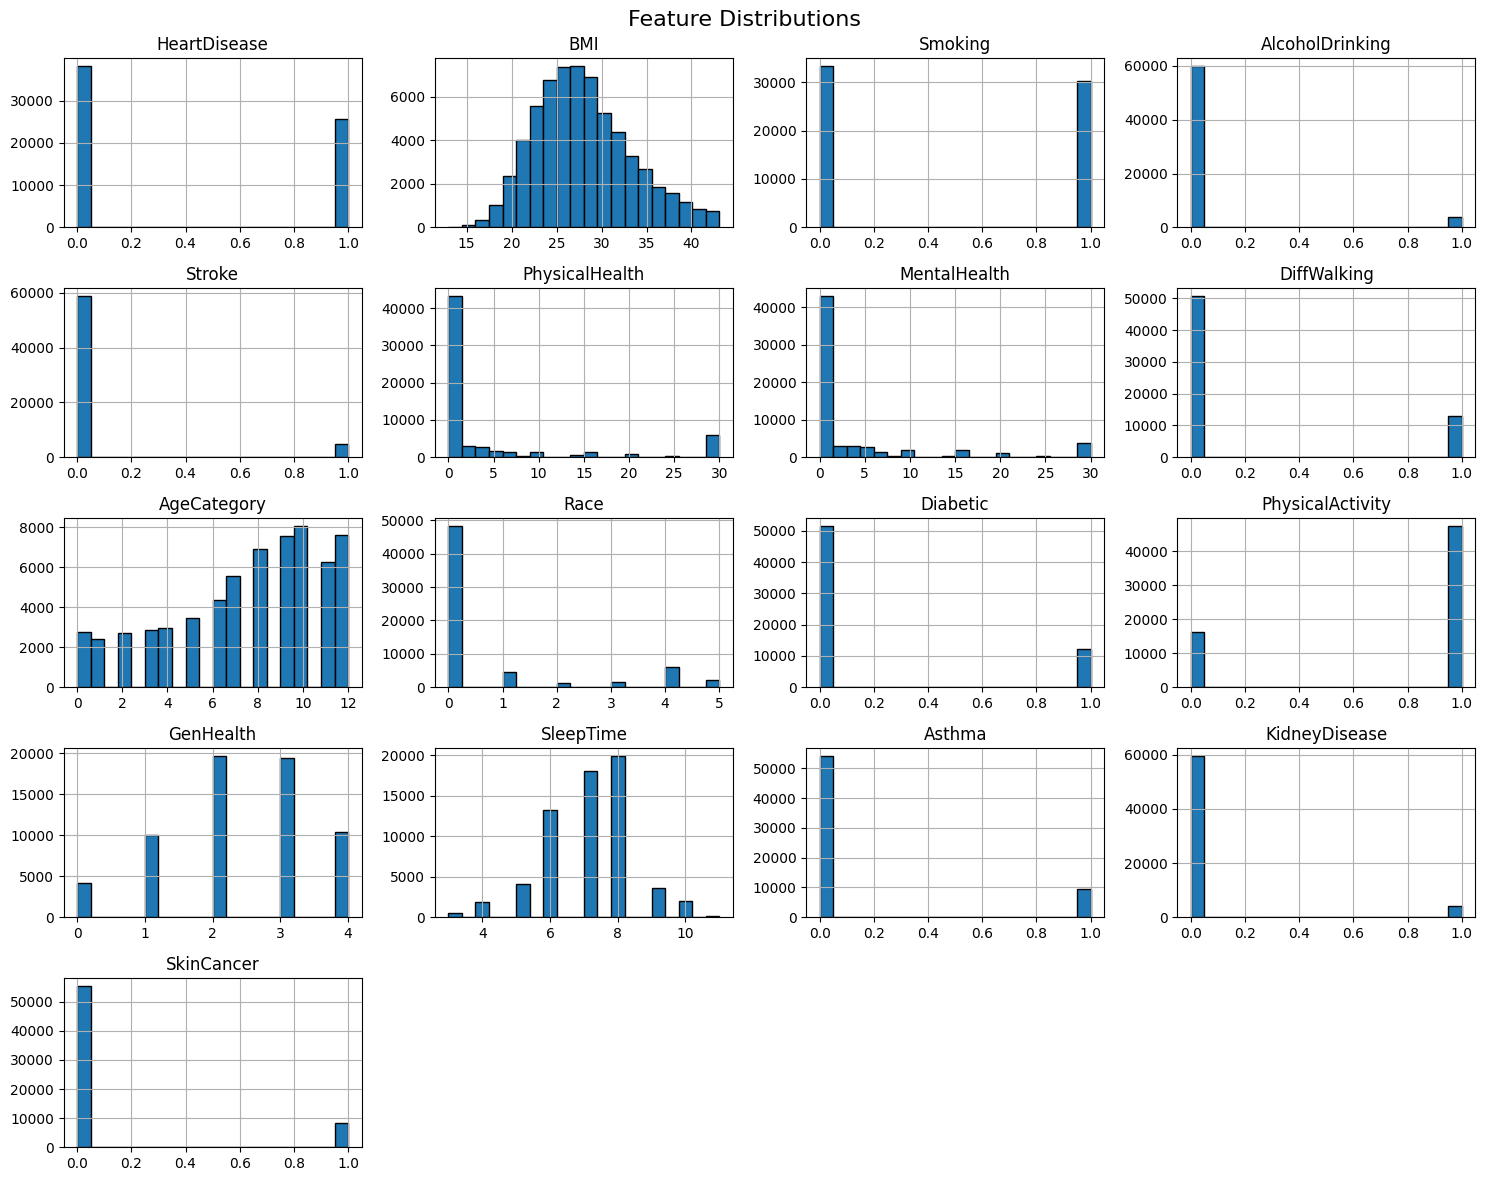

In [38]:
full_data.hist(figsize=(15, 12), bins=20, color='#1f77b4', edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.tight_layout()
plt.show()


---


# Milestone 3: Machine Learning Model Development and Optimization

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Model Training
- Split data into training, validation, and testing sets.
- Address imbalances using techniques like SMOTE or stratified sampling.

In [40]:
df= pd.read_csv("/content/i_hope_it_work.csv")
df.tail()

,Unnamed: 0,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
63611,43617,0,25.11,0,0,0,0,2,0,1,0,0,0,1,3,8,0,0,0
63612,43618,0,34.01,1,0,0,0,1,0,0,4,0,0,1,3,8,1,0,0
63613,43619,0,27.27,0,1,0,0,0,0,1,2,0,0,1,3,7,0,0,0
63614,43620,0,32.26,0,0,0,0,0,0,1,11,1,0,0,2,6,0,0,0
63615,43621,0,36.96,1,0,0,0,0,1,0,6,1,0,0,2,7,0,0,0


In [41]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [42]:
df.tail()
df.describe()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,63616.000000,63616.000000,63616.000000,63616.000000,63616.000000,63616.000000,63616.000000,63616.000000,63616.000000,63616.000000,63616.000000,63616.000000,63616.000000,63616.000000,63616.000000,63616.000000,63616.000000,63616.000000
mean,0.401267,27.927720,0.476185,0.059325,0.077355,4.729974,4.067436,0.204445,0.518203,7.476075,0.722428,0.191603,0.742769,2.340433,7.067845,0.151330,0.066053,0.131838
std,0.490159,5.346834,0.499436,0.236233,0.267156,9.358193,8.231912,0.403299,0.499672,3.472078,1.471427,0.393565,0.437111,1.124256,1.311664,0.358373,0.248376,0.338317
min,0.000000,12.970000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000
25%,0.000000,24.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,2.000000,6.000000,0.000000,0.000000,0.000000
50%,0.000000,27.340000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,1.000000,2.000000,7.000000,0.000000,0.000000,0.000000
75%,1.000000,31.240000,1.000000,0.000000,0.000000,3.000000,3.000000,0.000000,1.000000,10.000000,0.000000,0.000000,1.000000,3.000000,8.000000,0.000000,0.000000,0.000000
max,1.000000,43.100000,1.000000,1.000000,1.000000,30.000000,30.000000,1.000000,1.000000,12.000000,5.000000,1.000000,1.000000,4.000000,11.000000,1.000000,1.000000,1.000000


In [43]:
heart_disease_counts = df["HeartDisease"].value_counts()
print(heart_disease_counts)

HeartDisease
0    38089
1    25527
Name: count, dtype: int64


In [44]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Separate data into two groups: Heart Disease (1) and Non-Heart Disease (0)
heart_disease = df[df['HeartDisease'] == 1]
non_heart_disease = df[df['HeartDisease'] == 0]

# Split each group separately (70% train, 30% test)
X_heart_train, X_heart_test, y_heart_train, y_heart_test = train_test_split(
    heart_disease.drop(columns=['HeartDisease']), heart_disease['HeartDisease'], test_size=0.3, random_state=42)

X_non_heart_train, X_non_heart_test, y_non_heart_train, y_non_heart_test = train_test_split(
    non_heart_disease.drop(columns=['HeartDisease']), non_heart_disease['HeartDisease'], test_size=0.3, random_state=42)

# Combine the separate train and test sets
X_train = pd.concat([X_heart_train, X_non_heart_train], axis=0)
y_train = pd.concat([y_heart_train, y_non_heart_train], axis=0)

X_test = pd.concat([X_heart_test, X_non_heart_test], axis=0)
y_test = pd.concat([y_heart_test, y_non_heart_test], axis=0)

# Print class distribution after splitting
print("Train set distribution:\n", y_train.value_counts())
print("\nTest set distribution:\n", y_test.value_counts())

# Print shapes
print("\nX_train Shape:", X_train.shape, "y_train Shape:", y_train.shape)
print("X_test Shape:", X_test.shape, "y_test Shape:", y_test.shape)

Train set distribution:
 HeartDisease
0    26662
1    17868
Name: count, dtype: int64

Test set distribution:
 HeartDisease
0    11427
1     7659
Name: count, dtype: int64

X_train Shape: (44530, 17) y_train Shape: (44530,)
X_test Shape: (19086, 17) y_test Shape: (19086,)


In [45]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("After SMOTE:")
print(y_train_smote.value_counts())

After SMOTE:
HeartDisease
1    26662
0    26662
Name: count, dtype: int64


In [46]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_smote, y_train_smote)

xgb_pred = xgb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[23:05:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




Accuracy: 0.7533794404275385
              precision    recall  f1-score   support

           0       0.83      0.74      0.78     11427
           1       0.67      0.77      0.72      7659

    accuracy                           0.75     19086
   macro avg       0.75      0.76      0.75     19086
weighted avg       0.76      0.75      0.76     19086



In [47]:
# Random Forest Model
rf = RandomForestClassifier(n_estimators=150, max_depth=9, class_weight='balanced', random_state=42)
rf.fit(X_train_smote, y_train_smote)
rf_preds = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))


Accuracy: 0.7573090223200252
              precision    recall  f1-score   support

           0       0.85      0.73      0.78     11427
           1       0.66      0.81      0.73      7659

    accuracy                           0.76     19086
   macro avg       0.76      0.77      0.75     19086
weighted avg       0.77      0.76      0.76     19086



In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Decision Tree model
dt_model = DecisionTreeClassifier(class_weight='balanced', max_depth=8, random_state=42)
dt_model.fit(X_train_smote, y_train_smote)

# Predictions
dt_preds = dt_model.predict(X_test)


plt.show()



## Model Evaluation
- Metrics to consider: Accuracy, Precision, Recall, F1-score, RMSE, etc.
- Visual tools: Confusion matrices, ROC curves.

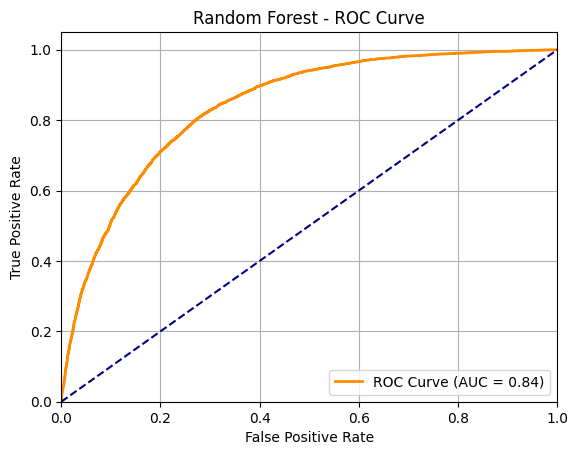

In [49]:

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


rf.fit(X_train_smote, y_train_smote)

# Get predicted probabilities for ROC curve
rf_proba = rf.predict_proba(X_test)[:, 1]  # Probability for the positive class

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest - ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


## Model Comparison
- Compare multiple models and justify the final model selection.

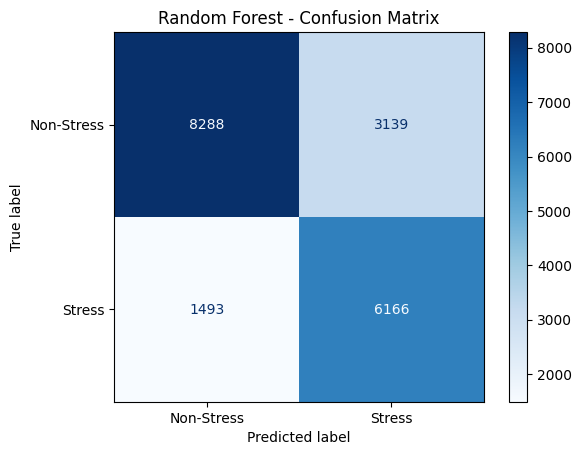

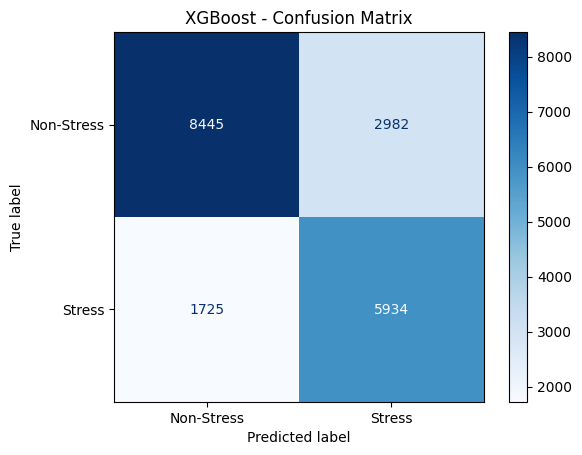

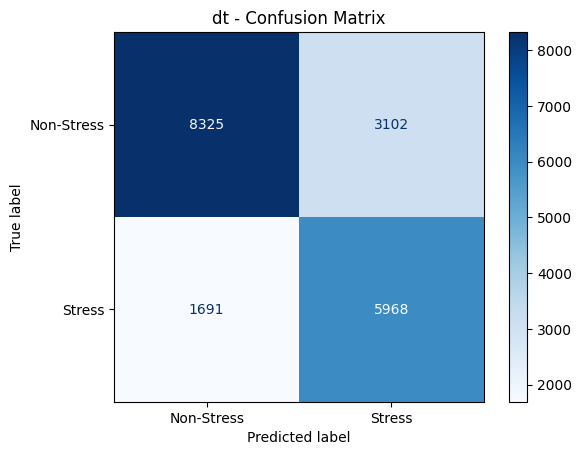

In [50]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Evaluation Function
def evaluate_model(name, y_true, y_pred):
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred, display_labels=["Non-Stress", "Stress"], cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

# Compare both
evaluate_model("Random Forest", y_test, rf_preds)
evaluate_model("XGBoost", y_test, xgb_pred)
evaluate_model("dt", y_test,dt_preds)



---


# Milestone 4: Deployment and Monitoring

## Deployment


In [51]:
%%writefile requirements.txt
streamlit
scikit-learn
joblib
numpy


Overwriting requirements.txt


In [52]:
import joblib

# Save the trained model to a file
joblib.dump(rf, "model.pkl")


['model.pkl']

In [53]:
%writefile streamlit_app.py

import streamlit as st
import joblib
import numpy as np
from sklearn.preprocessing import StandardScaler  # Or your scaler of choice

# Load the trained model
model = joblib.load('model.pkl')


# Streamlit UI for input
st.title("Heart Disease Prediction")

# Accept input for each column in the dataset
bmi = st.number_input("BMI", min_value=12.9, max_value=43.1, value=25.0)
smoking = st.selectbox("Smoking (1 = Yes, 0 = No)", options=[1, 0])
alcohol_drinking = st.selectbox("Alcohol Drinking (1 = Yes, 0 = No)", options=[1, 0])
stroke = st.selectbox("Stroke (1 = Yes, 0 = No)", options=[1, 0])
physical_health = st.number_input("Physical Health (Days)", min_value=0, max_value=30, value=0)
mental_health = st.number_input("Mental Health (Days)", min_value=0, max_value=30, value=0)
diff_walking = st.selectbox("Difficulty Walking (1 = Yes, 0 = No)", options=[1, 0])
sex = st.selectbox("Sex (1 = Male, 0 = Female)", options=[1, 0])
age_category = st.selectbox("Age Category", options=[1, 2, 3, 4, 5])  # Adjust options based on actual categories
race = st.selectbox("Race (1, 2, 3, ...)", options=[1, 2, 3, 4])  # Adjust based on race categories
diabetic = st.selectbox("Diabetic (1 = Yes, 0 = No)", options=[1, 0])
physical_activity = st.selectbox("Physical Activity (1 = Yes, 0 = No)", options=[1, 0])
gen_health = st.selectbox("General Health (1 = Excellent, 5 = Poor)", options=[1, 2, 3, 4, 5])
sleep_time = st.number_input("Sleep Time (Hours)", min_value=3, max_value=11, value=7)
asthma = st.selectbox("Asthma (1 = Yes, 0 = No)", options=[1, 0])
kidney_disease = st.selectbox("Kidney Disease (1 = Yes, 0 = No)", options=[1, 0])
skin_cancer = st.selectbox("Skin Cancer (1 = Yes, 0 = No)", options=[1, 0])
# Prepare the input features for prediction
features = np.array([[bmi, smoking, alcohol_drinking, stroke, physical_health, mental_health,
                      diff_walking, sex, age_category, race, diabetic, physical_activity,
                      gen_health, sleep_time, asthma, kidney_disease, skin_cancer]])


# Prediction
if st.button("Predict"):
    prediction = model.predict(features)
    if prediction[0] == 1:
        st.write("Prediction: Heart Disease")
    else:
        st.write("Prediction: No Heart Disease")


Writing streamlit_app.py
